In [1]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import os
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch
from torch import save, load
from PIL import Image
from torchvision.transforms import ToTensor
from torchsummary import summary
from torch.nn import ReLU
from torch.nn import Linear,CrossEntropyLoss
from torch.nn import MaxPool2d
from torch import flatten
from torch.nn import Softmax
from torch.optim import Adam

In [2]:
#import data
data = os.path.join('D:/PytorchProjects/potatodisease/data/')
len(data)

38

In [3]:
#transform the data
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    
    transforms.Normalize([0.4983, 0.5114, 0.4322], [0.2193, 0.2037, 0.2456])
    
    
])

In [4]:
traindata = os.path.join('D:/PytorchProjects/potatodisease/data/train/')
testdata = os.path.join('D:/PytorchProjects/potatodisease/data/test/')
valdata = os.path.join('D:/PytorchProjects/potatodisease/data/val/')

print(len(traindata))
print(len(testdata))
print(len(valdata))

44
43
42


In [5]:
train_data = ImageFolder(traindata,transform=transform)
test_data = ImageFolder(testdata, transform=transform)
val_data =  ImageFolder(valdata, transform=transform)

print("Lenght Of Dataset")
print(len(train_data))
print(len(test_data))
print(len(val_data))
len_train = len(train_data)
len_test = len(test_data)

print("Claases Of Dataset")



print(train_data.classes)
print(test_data.classes)
print(val_data.classes)

Lenght Of Dataset
1721
216
215
Claases Of Dataset
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
#Check Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
#Index Maping
print(train_data.class_to_idx)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [8]:
BATCH_SIZE = 64
NUM_EPOCH = 5

In [9]:
train_loader = DataLoader(train_data,batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

print(train_loader)
print(test_loader)

In [10]:
image, label = train_data[0]
image, label
image.size()


torch.Size([3, 224, 224])

In [11]:
#Image Plot
def imshow(img):
    img = image / 2 + 0.5      # unormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


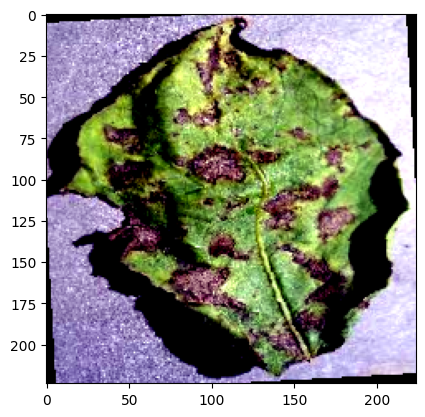

In [12]:
imshow(torchvision.utils.make_grid(image))

Create a CNN Model to Predication

In [63]:
#Defined the Model Architecture

class PotatoDisease(nn.Module):
    def __init__(self):
        super(PotatoDisease, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 32,kernel_size=(3,3))
        self.relu1 = ReLU()
        self.maxpool = MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels= 64,kernel_size=(3,3))
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels= 128,kernel_size=(3,3))
        self.relu3 = ReLU()
        self.maxpool3 = MaxPool2d(2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels= 128,kernel_size=(3,3))
        self.relu4 = ReLU()
        self.maxpool4 = MaxPool2d(2)
        
        self.fc1 = Linear(128*26*26, 400)
        self.relu5 = ReLU()
        
        self.fc2 = Linear(400, 3)
        self.Softmax = Softmax(dim=1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool(x)
        
        
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.maxpool4(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu5(x)
        
        x = self.fc2(x)
        outputs = self.Softmax(x)
        
        return outputs    
        
                                    

In [64]:
from torchsummary import summary

In [65]:
input_size = (3,224,224)

In [66]:
model = PotatoDisease()
print(model)
summary(model,input_size)

PotatoDisease(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu4): ReLU()
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=86528, out_features=400, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=400, out_features=3, bias=True)
  (Softmax): Softmax(dim=1)
)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x18432 and 86528x400)

In [21]:
optimizer = Adam(model.parameters(),lr=3e-4,weight_decay=0.0001)

loss_fn = CrossEntropyLoss()

In [24]:
from time import time
from tqdm import tqdm

In [25]:
for epoch in range(5):
    start = time()
    traning_acc = 0
    testacc = 0
    
    model.train()
    
    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimizer.zero_grad()
            
            xtrain = xtrain.to(device)
            
            train_prob = model(xtrain)
            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimizer.step()
            
            train_pred = torch.max(train_prob, 1).indices
            traning_acc += (torch.sum(train_pred == ytrain))
            
        ep_tr_acc = traning_acc / len_train
        
    model.eval()
    
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_pred = torch.max(test_prob, 1).indices
            testacc += int(torch.sum(test_pred == ytest))
            
        ep_test_acc = testacc / len_test
        
    end = time()
    ep_time = (end - start) /60 
    print(f"Epoch:{epoch}, Time:{ep_time},Loss:{loss}\nTrain_Acc:{ep_tr_acc},Test_Acc:{ep_test_acc}")       
            
            

100%|██████████| 27/27 [03:24<00:00,  7.59s/batch]


Epoch:0, Time:3.6415115634600324,Loss:0.7224100232124329
Train_Acc:0.7553747892379761,Test_Acc:0.8240740740740741


100%|██████████| 27/27 [04:18<00:00,  9.56s/batch]


Epoch:1, Time:4.526811214288076,Loss:0.7882561683654785
Train_Acc:0.8471818566322327,Test_Acc:0.8240740740740741


100%|██████████| 27/27 [03:28<00:00,  7.71s/batch]


Epoch:2, Time:3.681051782766978,Loss:0.7439826130867004
Train_Acc:0.8698431253433228,Test_Acc:0.8518518518518519


100%|██████████| 27/27 [03:24<00:00,  7.59s/batch]


Epoch:3, Time:3.6085418542226155,Loss:0.6353937387466431
Train_Acc:0.8791400194168091,Test_Acc:0.8703703703703703


100%|██████████| 27/27 [02:47<00:00,  6.19s/batch]


Epoch:4, Time:2.959525640805562,Loss:0.638850748538971
Train_Acc:0.9076118469238281,Test_Acc:0.8842592592592593


In [26]:
s1 = os.path.join('D:/PytorchProjects/potatodisease/data/test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG')
s2 = os.path.join('D:/PytorchProjects/potatodisease/data/test/Potato___Late_blight/1f440bb7-e35d-4bc9-a807-81dac78c54b8___RS_LB 2727.JPG')
s3 = os.path.join('D:/PytorchProjects/potatodisease/data/test/Potato___healthy/b89db9d3-a413-4781-bc88-5f6c2085ab5f___RS_HL 1909.JPG')
sample = [s1,s2,s3]

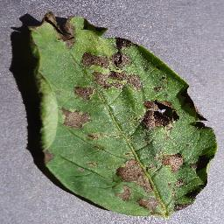

Model Predication 0, Early Blight
-----------------------------------------------


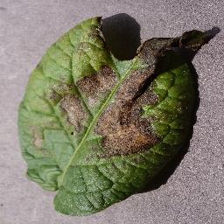

Model Predication 1, Late Blight
-----------------------------------------------


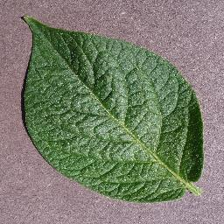

Model Predication 1, Late Blight
-----------------------------------------------


In [27]:
from PIL import Image

for image_path in sample:
    
    img = Image.open(image_path)
    display(img.resize((224,224)))
    img_tensor = transform(img)
    img_tensor = img_tensor[np.newaxis, :]
    img_tensor = img_tensor.to(device)
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    if pred == 0:
        print(f"Model Predication {pred}, Early Blight")
    elif pred == 1:
         print(f"Model Predication {pred}, Late Blight")
    else:
        print(f"Model Predication {pred}, Healthy")

    print("-----------------------------------------------")